# FOTD Model Fit Example

Fit some high order Model to a FOTD System

In [1]:
# General Pacakages
import sympy as sp
import numpy as np
import control as cn
#Plotting
import bokeh.plotting as bk
import bokeh.io as bi
from bokeh.io import export_svgs
bi.output_notebook()

import matplotlib.pyplot as plt
%matplotlib inline

# Algorithms
import Algorithms as alg

# TUBS Rot, Gelb, Orange, Hellgrün, Grün, Dunkelgrün, Hellblau, Blau, Dunkelblau, Violett
TUBScolorscale=[(190,30,60,0.9),
               (255,200,42,0.9),
               (225,109,0,0.9),
               (172,193,58,0.9),
               (109,131,0,0.9),
               (0,83,74,0.9),
               (102,180,211,0.9),
               (0,112,155,0.9),
               (0,63,87,0.9),
               (138,48,127,0.9)]

Loading BokehJS ...

In [2]:
## Generate a High Order System
num = [[[1]]]
den = [[[1,1.8,0.9]]]
G = cn.tf(num,den)
t = np.linspace(0,10,1000)
y, t = cn.step(G,t)
u = np.ones_like(t)
# Identify the parameter
K,T,L = alg.Integral_Identification(y,u,t)
num, den = cn.pade(L,10)
GM = cn.tf([K],[T,1])*cn.tf(num,den)
yM,tM = cn.step(GM,t)

In [3]:
# Define the figure
p1 = bk.figure(x_range=(t[0],t[-1]), y_range = (-0.1,np.ceil(np.max(y))), plot_width = 800, plot_height = 300)
#p1.grid.minor_grid_line_color = '#eeeeee'
# Define the Data
p1.line(tM,yM, line_color=TUBScolorscale[2], line_width = 2, legend="Model")
#p1.scatter(t,yreal, size=1,fill_color=TUBScolorscale[5],fill_alpha=0.4, legend="Measurement")
p1.line(t,y, line_color=TUBScolorscale[6], line_width = 2, line_dash = "dashed",legend="Original")
# Define the axis label
p1.xaxis.axis_label = "Time [min]"
p1.yaxis.axis_label = "Output"
p1.legend.location = "bottom_right"
# Show and Export
p1.output_backend = "svg"
export_svgs(p1, filename="Area_Example.svg")
bk.show(p1)

(102, 180, 211, 0.9)


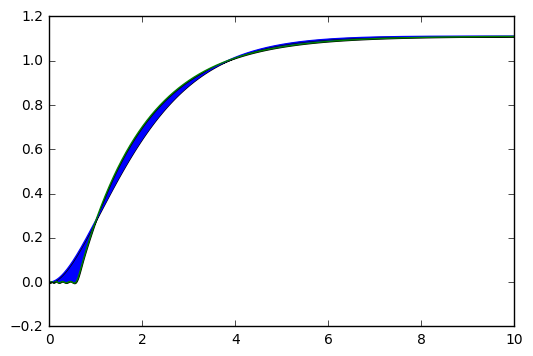

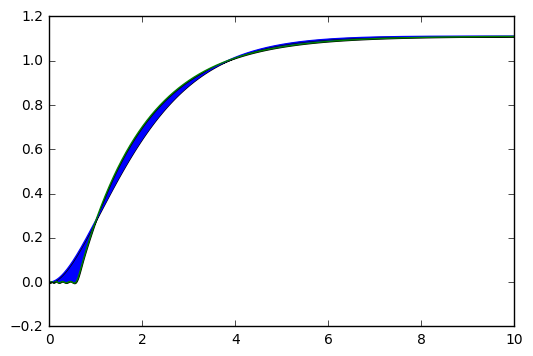

In [20]:
# Make an area plot
print( TUBScolorscale[6])
fig, ax = plt.subplots()
ax.plot(t,y)
ax.plot(t,yM)
ax.fill_between(t,y,yM)

bk


In [53]:
w = np.logspace(-5,5,1000)

real1,imag1,omega1 = cn.nyquist_plot(G,w)
real2,imag2,omega2 = cn.nyquist_plot(GM,w)

# Define the figure
p2 = bk.figure(plot_width = 800, plot_height = 300)
#p1.grid.minor_grid_line_color = '#eeeeee'
# Define the Data
p2.line(real2,imag2, line_color=TUBScolorscale[2], line_width = 2, legend="Model")
p2.line(real1,imag1, line_color=TUBScolorscale[6], line_width = 2, line_dash = "dashed",legend="Original")
# Define the axis label
p2.xaxis.axis_label = "Re"
p2.yaxis.axis_label = "Im"
p2.legend.location = "top_right"
# Show and Export
p2.output_backend = "svg"
export_svgs(p2, filename="Area_Nyquist.svg")
bk.show(p2)

In [54]:
mag1,phase1,omega1 = cn.bode_plot(G,w)
mag2,phase2,omega2 = cn.bode_plot(GM,w)

# Define the figure
p3 = bk.figure(plot_width = 800, plot_height = 300, x_axis_type="log", y_axis_type="log")

# Define the Data
p3.line(omega2,mag2, line_color=TUBScolorscale[2], line_width = 2, legend="Model")
p3.line(omega1,mag1, line_color=TUBScolorscale[6], line_width = 2, line_dash = "dashed",legend="Original")
# Define the axis label
p3.xaxis.axis_label = "Frequency [rad/s]"
p3.yaxis.axis_label = "Gain [dB]"

# Define the figure
p4 = bk.figure(plot_width = 800, plot_height = 300, x_axis_type="log", y_range = [-360,0])
# Define the Data
p4.line(omega2[np.where(phase2>-360)],phase2[np.where(phase2>-360)], line_color=TUBScolorscale[2], line_width = 2, legend="Model")
p4.line(omega1,phase1, line_color=TUBScolorscale[6], line_width = 2, line_dash = "dashed",legend="Original")
# Define the axis label
p4.xaxis.axis_label = "Frequency [rad/s]"
p4.yaxis.axis_label = "Phase [rad]"


c1 = bk.gridplot([[p3],[p4]])
# Show and Export
p3.output_backend = "svg"
p4.output_backend = "svg"

export_svgs(p3, filename="Area_Bode_Gain.svg")
export_svgs(p4, filename="Area_Bode_Phase.svg")

bk.show(c1)

In [55]:
# Define the figure
p5 = bk.figure(plot_width = 800, plot_height = 300, x_axis_type="log", y_axis_type="log")
# Define the Data
p5.line(omega2[np.where(mag2>mag1)],mag2[np.where(mag2>mag1)], line_color=TUBScolorscale[2], line_width = 2, legend="Robust")
p5.line(omega2[np.where(mag2<mag1)],mag2[np.where(mag2<mag1)], line_color=TUBScolorscale[0], line_width = 2, legend="Robust")
p5.line(omega1,mag1, line_color=TUBScolorscale[6], line_width = 2, line_dash = "dashed",legend="Original")
# Define the axis label
p5.xaxis.axis_label = "Frequency [rad/s]"
p5.yaxis.axis_label = "Gain [dB]"


# Define the figure
p6 = bk.figure(plot_width = 800, plot_height = 300, x_axis_type="log", y_range = [-360,0])
# Define the Data
p6.line(omega2[np.where(phase2<phase1)],phase2[np.where(phase2<phase1)], line_color=TUBScolorscale[2], line_width = 2, legend="Robust")
p6.line(omega2[np.where(phase2>phase1)],phase2[np.where(phase2> phase1)], line_color=TUBScolorscale[0], line_width = 2, legend="Not Robust")
p6.line(omega1,phase1, line_color=TUBScolorscale[6], line_width = 2, line_dash = "dashed",legend="Original")
# Define the axis label
p6.xaxis.axis_label = "Frequency [rad/s]"
p6.yaxis.axis_label = "Phase [rad]"


c1 = bk.gridplot([[p5],[p6]])
# Show and Export
p5.output_backend = "svg"
p6.output_backend = "svg"

#export_svgs(p3, filename="Area_Bode_Gain.svg")
#export_svgs(p4, filename="Area_Bode_Phase.svg")

bk.show(c1)

In [42]:
## Generate a High Order System
num = [[[1]]]
den = [[[1,.5,1]]]
G = cn.tf(num,den)
t = np.linspace(0,130,1300)
y1, t1 = cn.step(G,t)
u = np.ones_like(y)
np.argmax(yreal), np.size(yreal)
GM = Area_Fit(y1,u,t)
yM1,tM1 = cn.step(GM,t)

## Generate a High Order System
num = [[[1]]]
den = [[[1,1.5,1]]]
G = cn.tf(num,den)
t = np.linspace(0,130,1300)
y2, t2 = cn.step(G,t)
u = np.ones_like(y2)
np.argmax(yreal), np.size(yreal)
GM = Area_Fit(y2,u,t2)
yM2,tM2 = cn.step(GM,t)

## Generate a High Order System
num = [[[1]]]
den = [[[1,10,1]]]
G = cn.tf(num,den)
t = np.linspace(0,130,1300)
y3, t3 = cn.step(G,t)
u = np.ones_like(y3)
np.argmax(yreal), np.size(yreal)
GM = Area_Fit(y3,u,t3)
yM3,tM3 = cn.step(GM,t3)

1300
32
1.44394660057
1.44394660057
0.667262449091
0.830443161261
1.49770561035
1300
47
1.02834469168
1.02834469168
0.983750154171
0.647211076527
1.6309612307
1300
1299
0.999998000092
0.999998000092
9.74130391083
0.258437663845
9.99974157468


In [44]:
# Define the figure
p1 = bk.figure(x_range=(t[0],t[-1]), plot_width = 800, plot_height = 300)
#p1.grid.minor_grid_line_color = '#eeeeee'
# Define the Data
p1.line(tM1,yM1, line_color=TUBScolorscale[2], line_width = 2, legend="Underdamped Model")
p1.line(t1,y1, line_color=TUBScolorscale[6], line_width = 2, line_dash = "dashed",legend="Underdamped System")

p1.line(tM2,yM2, line_color=TUBScolorscale[2], line_width = 2, legend="Damped Model")
p1.line(t2,y2, line_color=TUBScolorscale[6], line_width = 2, line_dash = "dashed",legend="Damped System")


p1.line(tM3,yM3, line_color=TUBScolorscale[2], line_width = 2, legend="Overdamped Model")
p1.line(t3,y3, line_color=TUBScolorscale[6], line_width = 2, line_dash = "dashed",legend="Overdamped System")


# Define the axis label
p1.xaxis.axis_label = "Time [min]"
p1.yaxis.axis_label = "Output"
p1.legend.visible = False
# Show and Export
p1.output_backend = "svg"
export_svgs(p1, filename="Area_Fitting.svg")
bk.show(p1)